In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [21]:
# !pip install tensorflow-gpu==2.3
# !pip install sklearn

In [22]:
import tensorflow
import tensorflow as tf

In [23]:
tf.config.list_physical_devices('GPU')

[]

In [24]:
tf.test.is_gpu_available()

False

In [25]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16495416793614196120]

In [26]:
actions = [
    'assult',
    'nomal',
    ]

file_dir = 'C:/Users/chltp/detect_video/dataset/'#seq 파일을 dataset 폴더에 넣어주세요

npy_file = []
for name in os.listdir(file_dir):
    if not len(np.load(file_dir + name)) == 0:
        npy_file.append(np.load(file_dir + name))

data = np.concatenate(npy_file, axis=0)

data.shape

(4115, 30, 3)

In [27]:
x_data = data[:, :, :]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(4115, 30, 3)
(4115,)


In [28]:
for i in range(4115):
    for j in range(29):
        if x_data[i][j][2]==7 or x_data[i][j][2]==9 or x_data[i][j][2]==11:
            x_data[i][j][2]=1
        else: x_data[i][j][2]=0

In [29]:
# # punching = []
# # kicking = []
# # normal = []

# slap_L = []
# slap_R = []
# pushing_A = []
# pushing_L = []
# pushing_R = []
# punching_L = []
# puncning_R = []
# kicking_L = []
# kicking_R = []
# tread_L = []
# tread_R = []
# footpushing_L = []
# footpushing_R = []
# normal = []

# count = 0
# for count in range(len(x_data)):
#     temp_count = 0
#     temp = 0
#     for j in range(30):
#         for i in range(54, 66):
#             t = data[count][j][i]
#     #         print(t)
#             if t != 0 and not np.isnan(t):
#                 temp += int(t)
#                 temp_count += 1
#     #             print(temp)
#         if not temp_count == 0:
#             if data[count][j][66] == 0:
#                 slap_L.append(temp / temp_count)
#             if data[count][j][66] == 1:
#                 slap_R.append(temp / temp_count)
#             if data[count][j][66] == 2:
#                 pushing_A.append(temp / temp_count)
#             if data[count][j][66] == 3:
#                 pushing_L.append(temp / temp_count)
#             if data[count][j][66] == 4:
#                 pushing_R.append(temp / temp_count)
#             if data[count][j][66] == 5:
#                 punching_L.append(temp / temp_count)
#             if data[count][j][66] == 6:
#                 puncning_R.append(temp / temp_count)
#             if data[count][j][66] == 7:
#                 kicking_L.append(temp / temp_count)
#             if data[count][j][66] == 8:
#                 kicking_R.append(temp / temp_count)
#             if data[count][j][66] == 9:
#                 tread_L.append(temp / temp_count)
#             if data[count][j][66] == 10:
#                 tread_R.append(temp / temp_count)
#             if data[count][j][66] == 11:
#                 footpushing_L.append(temp / temp_count)
#             if data[count][j][66] == 12:
#                 footpushing_R.append(temp / temp_count)
#             if data[count][j][66] == 13 and len(normal) < 40000:
#                 normal.append(temp / temp_count)
            
# plt.plot(slap_L, '--', slap_R, '--', pushing_A, '--', pushing_L, '--', pushing_R, '--', punching_L, '--', puncning_R, '--', kicking_L, '--', kicking_R, '--', tread_L, '--', tread_R, '--', footpushing_L, '--', footpushing_R, '--', normal, 'r--')
# plt.show()

In [30]:
# plt.plot(slap_L, 'r--', slap_R, 'r--', pushing_A, 'r--', pushing_L, 'r--', pushing_R, 'r--', punching_L, 'r--', puncning_R, 'r--', kicking_L, 'g--', kicking_R, 'g--', tread_L, 'g--', tread_R, 'g--', footpushing_L, 'g--', footpushing_R, 'g--', normal, 'b--')
# plt.show()

In [31]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(4115, 2)

In [32]:
y_data[0]

array([1., 0.], dtype=float32)

In [33]:
# array([0., 1.],

In [34]:
from sklearn.model_selection import train_test_split


x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3703, 30, 3) (3703, 2)
(412, 30, 3) (412, 2)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 19,554
Trainable params: 19,554
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
113/116 [============================>.] - ETA: 0s - loss: 1.5065 - acc: 0.6704
Epoch 00001: val_acc improved from -inf to 0.91990, saving model to models\model.h5
116/116 [==============================] - 1s 9ms/step - loss: 1.4787 - acc: 0.6759 - val_loss: 0.3848 - val_acc: 0.9199
Epoch 2/200
112/116 [===========================>..] - ETA: 0s - loss: 0.1319 - acc: 0.9612
Epoch 00002: val_acc improved from 0.91990 to 0.93689, saving model to models\model.h5
116/116 [==============================] - 1s 7ms/step - loss: 0.1306 - acc: 0.9619 - val_loss: 0.5517 - val_acc: 0.9369
Epoch 3/200
111/116 [===========================>..] - ETA: 0s - loss: 0.0665 - acc: 0.9735
Epoch 00003: val_acc improved from 0.93689 to 0.95631, saving model to models\model.h5
116/116 [==============================] - 1s 7ms/step - loss: 0.0645 - acc: 0.9743 - val_loss: 0.1158 - val_acc: 0.9563
Epoch 4/200
116/116 [==============================] - ETA: 0s - loss: 0.0695 - acc: 0.9787
Epoch 00004

112/116 [===========================>..] - ETA: 0s - loss: 0.0937 - acc: 0.9676
Epoch 00031: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 7ms/step - loss: 0.0927 - acc: 0.9681 - val_loss: 0.2485 - val_acc: 0.9199
Epoch 32/200
115/116 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9660
Epoch 00032: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 6ms/step - loss: 0.0984 - acc: 0.9662 - val_loss: 0.1305 - val_acc: 0.9563
Epoch 33/200
113/116 [============================>.] - ETA: 0s - loss: 0.0771 - acc: 0.9718
Epoch 00033: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 7ms/step - loss: 0.0767 - acc: 0.9722 - val_loss: 0.0851 - val_acc: 0.9684
Epoch 34/200
116/116 [==============================] - ETA: 0s - loss: 0.0725 - acc: 0.9730
Epoch 00034: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 6ms/step - loss: 0.0725 - acc: 0

Epoch 62/200
110/116 [===========================>..] - ETA: 0s - loss: 0.0048 - acc: 0.9986
Epoch 00062: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 7ms/step - loss: 0.0053 - acc: 0.9984 - val_loss: 0.0154 - val_acc: 0.9903
Epoch 63/200
110/116 [===========================>..] - ETA: 0s - loss: 0.0043 - acc: 0.9983
Epoch 00063: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 7ms/step - loss: 0.0053 - acc: 0.9981 - val_loss: 0.0148 - val_acc: 0.9951
Epoch 64/200
116/116 [==============================] - ETA: 0s - loss: 0.0045 - acc: 0.9989
Epoch 00064: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 6ms/step - loss: 0.0045 - acc: 0.9989 - val_loss: 0.0129 - val_acc: 0.9951
Epoch 65/200
109/116 [===========================>..] - ETA: 0s - loss: 0.0047 - acc: 0.9983
Epoch 00065: val_acc did not improve from 0.99515
116/116 [==============================] - 1s 6ms/step - loss: 0.

Epoch 93/200
116/116 [==============================] - ETA: 0s - loss: 1.3622e-04 - acc: 1.0000
Epoch 00093: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 1.3622e-04 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 0.9976
Epoch 94/200
108/116 [==========================>...] - ETA: 0s - loss: 1.3369e-04 - acc: 1.0000
Epoch 00094: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 1.2923e-04 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 0.9976
Epoch 95/200
110/116 [===========================>..] - ETA: 0s - loss: 1.2874e-04 - acc: 1.0000
Epoch 00095: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 7ms/step - loss: 1.2309e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 0.9976
Epoch 96/200
115/116 [============================>.] - ETA: 0s - loss: 1.1628e-04 - acc: 1.0000
Epoch 00096: val_acc did not improve from 1.00000
116/116 [============================

Epoch 123/200
109/116 [===========================>..] - ETA: 0s - loss: 1.7087e-05 - acc: 1.0000
Epoch 00123: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 1.6426e-05 - acc: 1.0000 - val_loss: 0.0641 - val_acc: 0.9976
Epoch 124/200
112/116 [===========================>..] - ETA: 0s - loss: 1.5516e-05 - acc: 1.0000
Epoch 00124: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 7ms/step - loss: 1.5152e-05 - acc: 1.0000 - val_loss: 0.0617 - val_acc: 0.9976
Epoch 125/200
116/116 [==============================] - ETA: 0s - loss: 1.4941e-05 - acc: 1.0000
Epoch 00125: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 1.4941e-05 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9976
Epoch 126/200
116/116 [==============================] - ETA: 0s - loss: 1.3761e-05 - acc: 1.0000
Epoch 00126: val_acc did not improve from 1.00000
116/116 [========================

114/116 [============================>.] - ETA: 0s - loss: 3.4426e-06 - acc: 1.0000
Epoch 00153: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 3.4261e-06 - acc: 1.0000 - val_loss: 0.1103 - val_acc: 0.9951
Epoch 154/200
115/116 [============================>.] - ETA: 0s - loss: 3.2143e-06 - acc: 1.0000
Epoch 00154: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 3.2209e-06 - acc: 1.0000 - val_loss: 0.1552 - val_acc: 0.9927
Epoch 155/200
112/116 [===========================>..] - ETA: 0s - loss: 2.9739e-06 - acc: 1.0000
Epoch 00155: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 7ms/step - loss: 2.9343e-06 - acc: 1.0000 - val_loss: 0.1903 - val_acc: 0.9927
Epoch 156/200
109/116 [===========================>..] - ETA: 0s - loss: 2.6160e-06 - acc: 1.0000
Epoch 00156: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 7

Epoch 183/200
110/116 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 0.9991
Epoch 00183: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 7ms/step - loss: 0.0034 - acc: 0.9992 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 184/200
110/116 [===========================>..] - ETA: 0s - loss: 0.0028 - acc: 0.9994
Epoch 00184: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 7ms/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 185/200
113/116 [============================>.] - ETA: 0s - loss: 0.0024 - acc: 0.9997
Epoch 00185: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss: 0.0024 - acc: 0.9997 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 186/200
109/116 [===========================>..] - ETA: 0s - loss: 0.0035 - acc: 0.9994
Epoch 00186: val_acc did not improve from 1.00000
116/116 [==============================] - 1s 6ms/step - loss

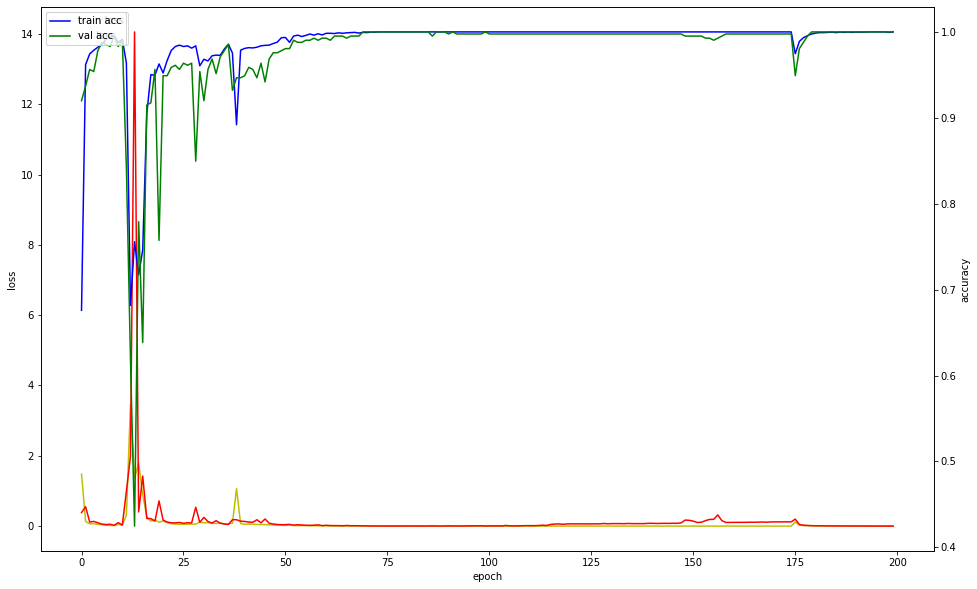

In [37]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [38]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[144,   0],
        [  0, 268]],

       [[268,   0],
        [  0, 144]]], dtype=int64)